In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

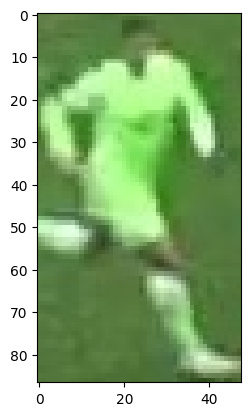

In [3]:
plt.imshow(image)
plt.show()

### Take top half of the image

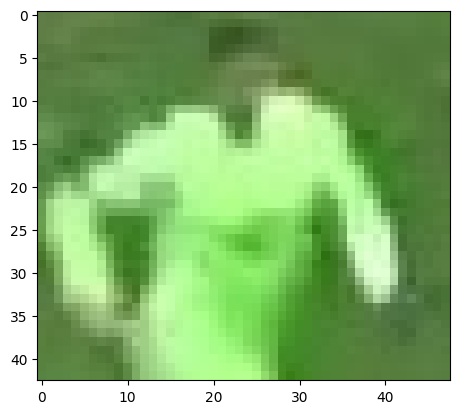

In [4]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

### Cluster the image into 2 clusters

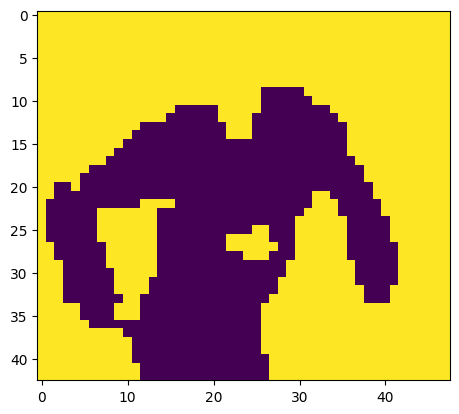

In [7]:
# Reshape the image into a 2D array

image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

#### Get corner clusters and assign to background

In [8]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(f"Non-player cluster: {non_player_cluster}")

Non-player cluster: 1


In [9]:
# Assign player cluster as the other cluster
player_cluster = 1 - non_player_cluster
print(f"Player cluster: {player_cluster}")

Player cluster: 0


In [10]:
# Gives the rgb values of the player cluster centroid
kmeans.cluster_centers_[player_cluster]

array([170.28929987, 235.7331572 , 142.1321004 ])